In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Baca data dari file CSV
data = pd.read_csv('output.csv')

In [4]:
# Hitung error absolut
data['AbsoluteError'] = data['Error'].abs()

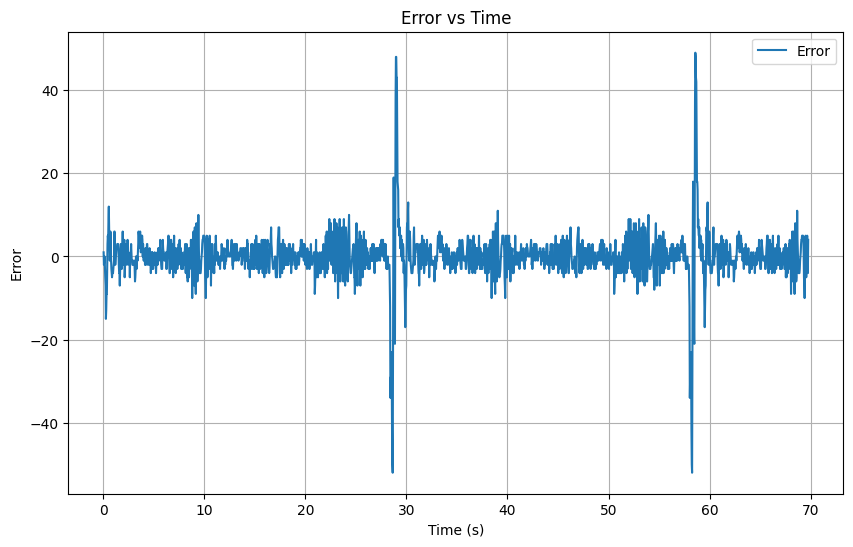

In [5]:
# Plot Error terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Analisis Transien Respon
set_point = 160

In [7]:
# Menemukan overshoot
max_error = data['Error'].max()
overshoot = ((max_error - set_point) / set_point) * 100

In [8]:
# Menemukan settling time (waktu stabilisasi)
threshold = 0.05 * set_point
settling_time = data.loc[data['AbsoluteError'] <= threshold, 'Time'].min()

In [9]:
# Menemukan rise time (waktu naik)
rise_time = data.loc[data['Error'] >= set_point, 'Time'].min()

In [10]:
# Menampilkan hasil analisis transien respon
print(f'Overshoot: {overshoot}%')
print(f'Settling Time: {settling_time} s')
print(f'Rise Time: {rise_time} s')

Overshoot: -69.375%
Settling Time: 0.032 s
Rise Time: nan s


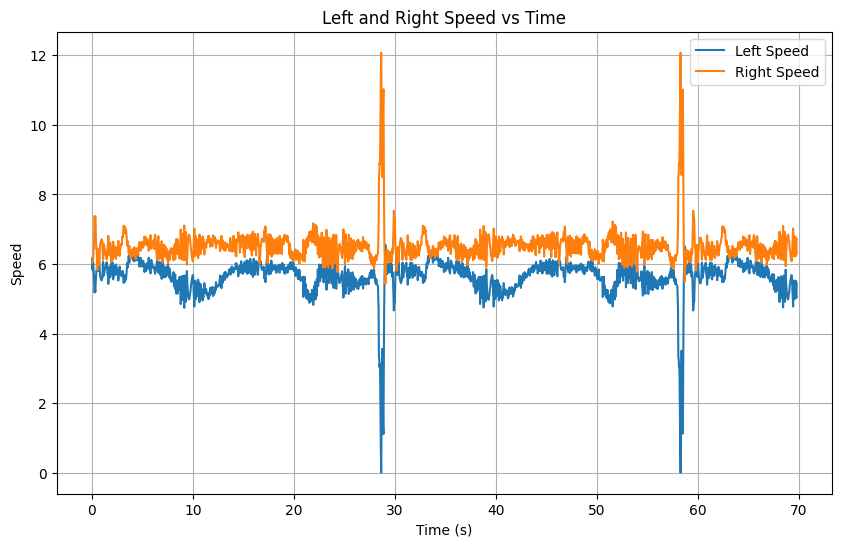

In [11]:
# Plot Kecepatan Kiri dan Kanan terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['LeftSpeed'], label='Left Speed')
plt.plot(data['Time'], data['RightSpeed'], label='Right Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed')
plt.title('Left and Right Speed vs Time')
plt.legend()
plt.grid()
plt.show()

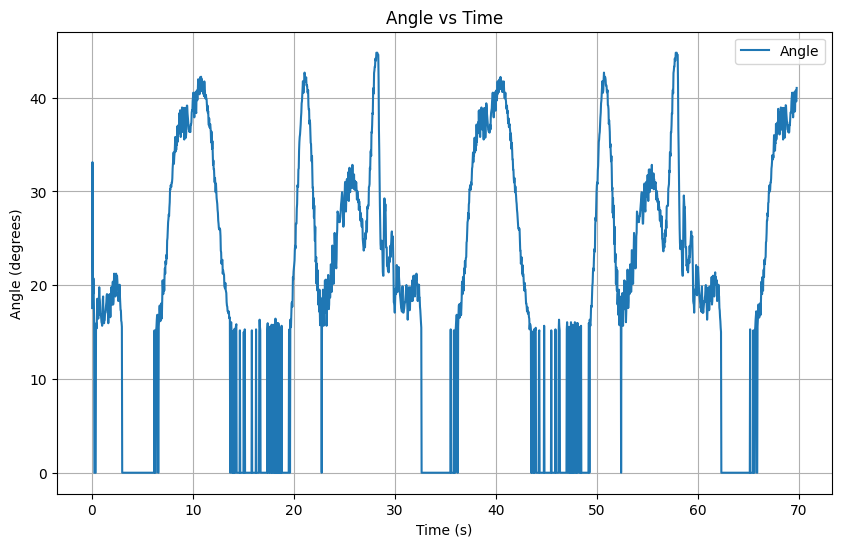

In [12]:
# Plot Sudut terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Angle'], label='Angle')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Angle vs Time')
plt.legend()
plt.grid()
plt.show()

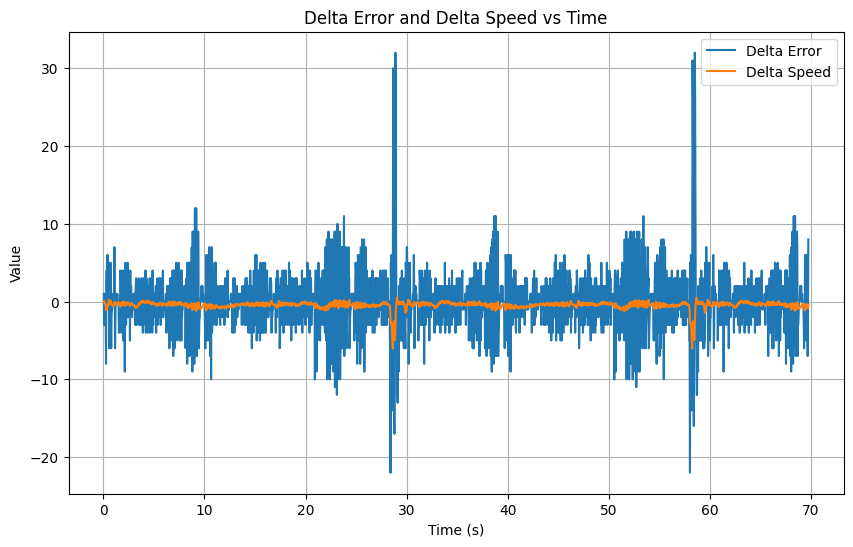

In [13]:
# Plot Delta Error dan Delta Speed terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['DeltaError'], label='Delta Error')
plt.plot(data['Time'], data['DeltaSpeed'], label='Delta Speed')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Delta Error and Delta Speed vs Time')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Analisis tambahan
# Steady-State Error
steady_state_error = data['Error'].iloc[-1]
print(f'Steady-State Error: {steady_state_error}')

Steady-State Error: 4


In [15]:
# Control Effort Analysis
control_effort_left = data['LeftSpeed'].sum()
control_effort_right = data['RightSpeed'].sum()
print(f'Control Effort (Left): {control_effort_left}')
print(f'Control Effort (Right): {control_effort_right}')

Control Effort (Left): 12273.041351609343
Control Effort (Right): 14258.441271609343


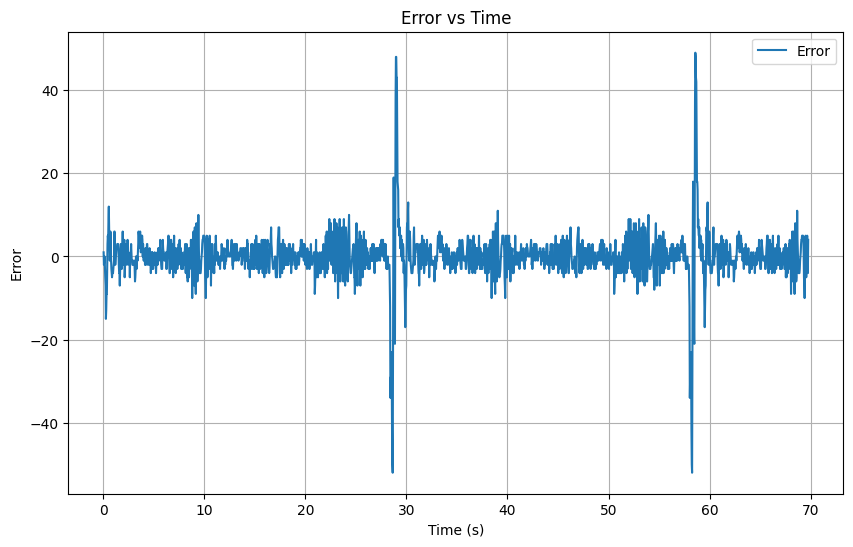

Overshoot: -69.375%
Settling Time: 0.032 s
Rise Time: nan s


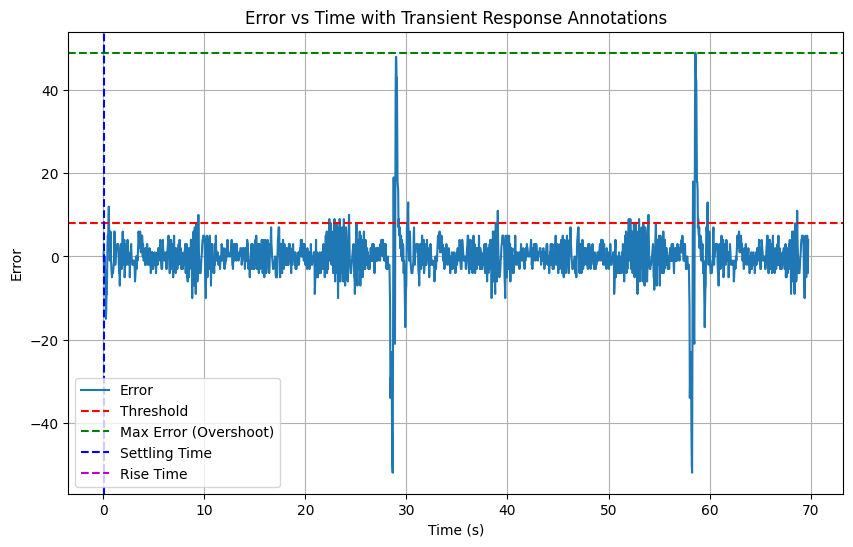

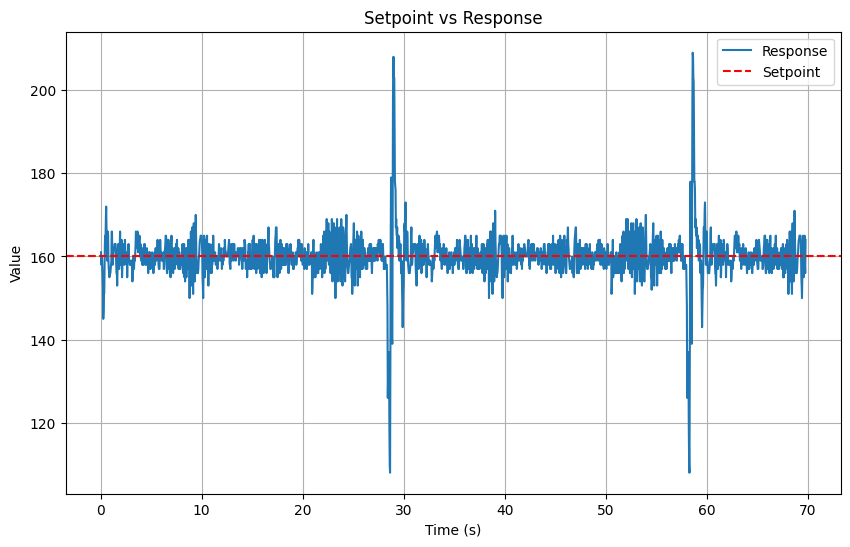

In [16]:
# Plot Error terhadap Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time')
plt.legend()
plt.grid()
plt.show()

# Analisis Transien Respon
set_point = 160

# Menemukan overshoot
max_error = data['Error'].max()
overshoot = ((max_error - set_point) / set_point) * 100

# Menemukan settling time (waktu stabilisasi)
threshold = 0.05 * set_point
settling_time = data.loc[data['AbsoluteError'] <= threshold, 'Time'].min()

# Menemukan rise time (waktu naik)
rise_time = data.loc[data['Error'] >= set_point, 'Time'].min()

# Menampilkan hasil analisis transien respon
print(f'Overshoot: {overshoot}%')
print(f'Settling Time: {settling_time} s')
print(f'Rise Time: {rise_time} s')

# Plot Error vs Time dengan anotasi untuk Overshoot, Settling Time, dan Rise Time
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=max_error, color='g', linestyle='--', label='Max Error (Overshoot)')
plt.axvline(x=settling_time, color='b', linestyle='--', label='Settling Time')
plt.axvline(x=rise_time, color='m', linestyle='--', label='Rise Time')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error vs Time with Transient Response Annotations')
plt.legend()
plt.grid()
plt.show()

# Plot Setpoint vs Response
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'] + set_point, label='Response')
plt.axhline(y=set_point, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Setpoint vs Response')
plt.legend()
plt.grid()
plt.show()